In [1]:
import catppuccin
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
mpl.style.use(catppuccin.PALETTE.mocha.identifier)

#### Используемые константы

In [2]:
N = int(1e6)
L = 1.0  # длина пробега (среднеквадратичная)
R0 = np.sqrt(N) * L

#### Функция для генерации траекторий случайных блужданий

In [3]:
def random_path(N, L, distr="normal", alpha=3.0):
    # случайные направления
    v = np.random.normal(size=(2, N))
    nv = v / np.sqrt(np.sum(v**2, 0))  # нормировка

    # случайные длины шагов
    if distr == "pareto":
        # распределение Парето (тяжелый хвост)
        steps = L * (np.random.pareto(alpha, N))
    else:
        # нормальное распределение (классическое броуновское движение)
        steps = np.random.normal(scale=L, size=N)
    R = np.cumsum(nv * steps, axis=1)
    return R

#### Непосредственная генерация траекторий и визуализация

In [5]:
def calculate_random_paths(num_paths=5, N=N, L=L, distr="normal", alpha=3.0):
    R = []
    for i in range(num_paths):
        R.append(random_path(N, L, distr, alpha))
    return R


def plot_random_paths(R, distr="normal"):
    plt.rcParams["figure.figsize"] = [10, 10]
    ax = plt.gca()
    plt.axis("equal")

    for graph in R:
        ax.plot(graph[0], graph[1], "-")

    R0 = np.sqrt(N) * L
    ax.add_patch(Circle((0, 0), R0, color="lavender", fill=False, zorder=10))
    ax.add_patch(Circle((0, 0), 10, color="lavender", zorder=10))
    for graph in R:
        end_x, end_y = graph[0, -1], graph[1, -1]
        ax.plot(end_x, end_y, "ro", markersize=3)

    plt.title(f"Random Walks with {distr.capitalize()} Distribution")
    plt.grid(True)
    plt.show()


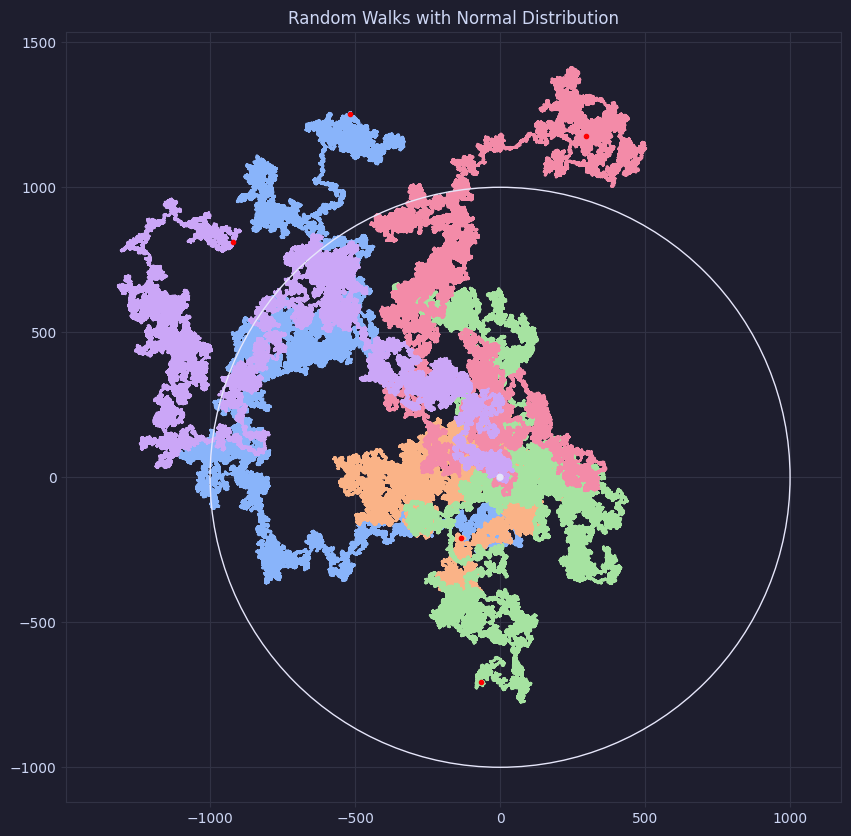

In [6]:
NUM_PATHS = 5
graph = calculate_random_paths(num_paths=NUM_PATHS, distr="normal", alpha=3.0)
plot_random_paths(graph, distr="normal")

#### Строим распределение для большого кол-ва частиц

Траектории рисовать не будем, их слишком много, по такому графику мы ничего не прочитаем.

In [7]:
def calculate_endpoints(num_paths=1000, N=N, L=L, distr="normal", alpha=3.0):
    endpoints = np.zeros((num_paths, 2))
    for i in range(num_paths):
        path = random_path(N, L, distr, alpha)
        endpoints[i, 0] = path[0, -1]
        endpoints[i, 1] = path[1, -1]
    return endpoints


In [8]:

normal_endpoints = calculate_endpoints(num_paths=1000, distr="normal", alpha=3.0)

In [11]:
def plot_endpoints(endpoints, distr="normal"):
    plt.rcParams["figure.figsize"] = [10, 10]
    ax = plt.gca()
    plt.axis("equal")

    ax.scatter(endpoints[:, 0], endpoints[:, 1], s=1, color="cyan", alpha=0.5)

    R0 = np.sqrt(N) * L
    ax.add_patch(Circle((0, 0), R0, color="lavender", fill=False, zorder=10))
    ax.add_patch(Circle((0, 0), 10, color="lavender", zorder=10))

    plt.title(f"Endpoints of Random Walks with {distr.capitalize()} Distribution")
    plt.grid(True)
    plt.show()


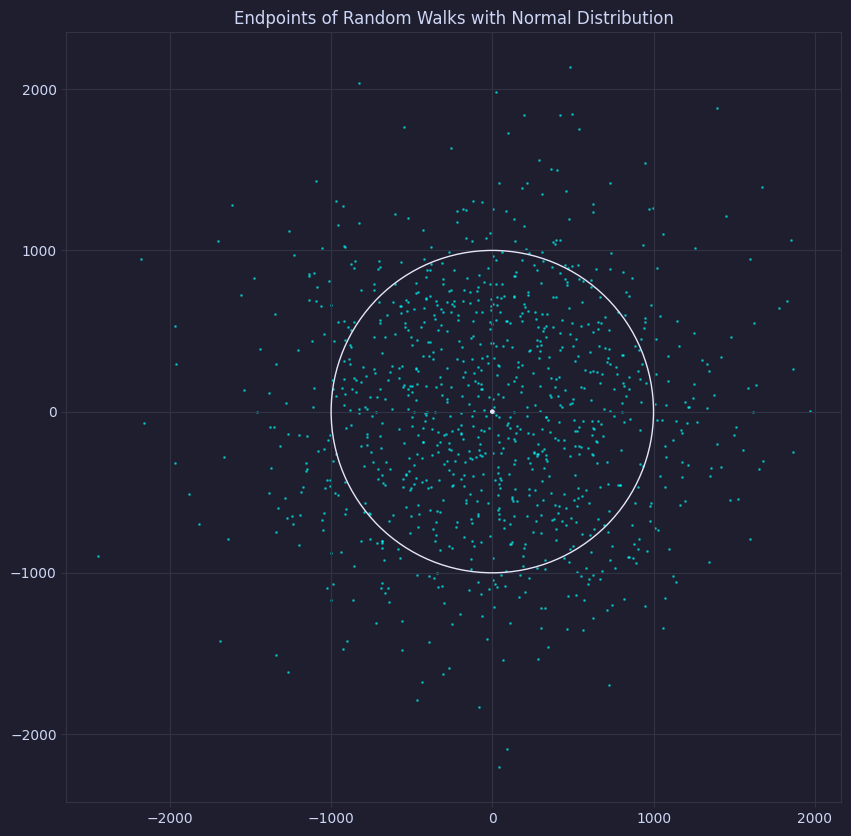

In [12]:

plot_endpoints(normal_endpoints, distr="normal")

#### Строим график распределения точек в зависимости от расстояния до центра (точки старта)

И сравниваем его с распределением Рэлея

In [13]:
def calculate_distances(endpoints):
    return np.sqrt(np.sum(endpoints**2, axis=1))



In [14]:

normal_distances = calculate_distances(normal_endpoints)


In [15]:
def plot_distance_histogram(distances, distribution_name="Normal", bins=10, alpha=0.7):
    plt.figure(figsize=(10, 6))
    plt.hist(distances, bins=bins, alpha=alpha, density=True)
    plt.title(
        f"Distribution of Distances from Origin ({distribution_name} Distribution)"
    )
    x = np.linspace(min(distances), max(distances), 1000)
    if distribution_name == "Normal":
        sigma = np.sqrt(N) * L / np.sqrt(2)
        pdf = (x / sigma**2) * np.exp(-(x**2) / (2 * sigma**2))
        plt.plot(x, pdf, "r-", linewidth=2, label="Theoretical Rayleigh distribution")
        plt.axvline(
            x=R0,
            color="r",
            linestyle="--",
            label=f"Expected radius (R₀={R0:.2f})",
        )
        plt.legend()
    plt.xlabel("Distance")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()



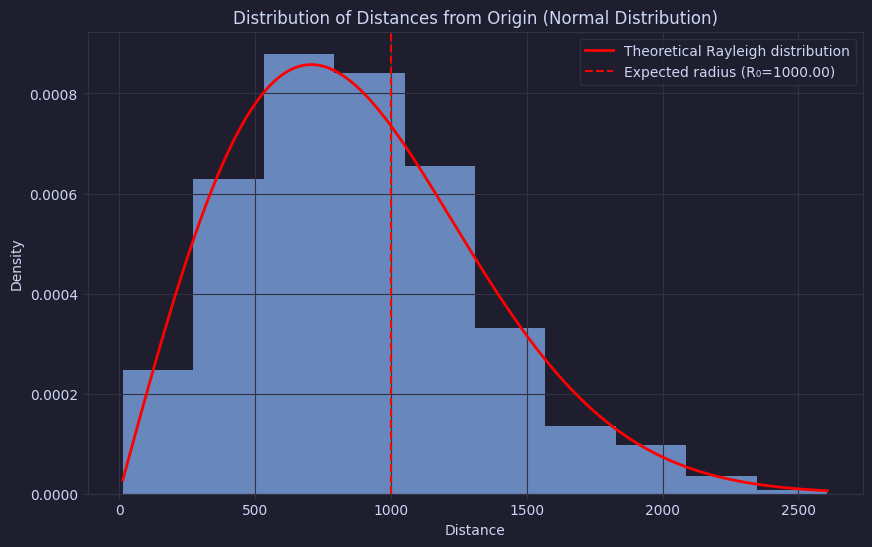

In [16]:
plot_distance_histogram(normal_distances)

#### Дополнение: случайные блуждания по Парето

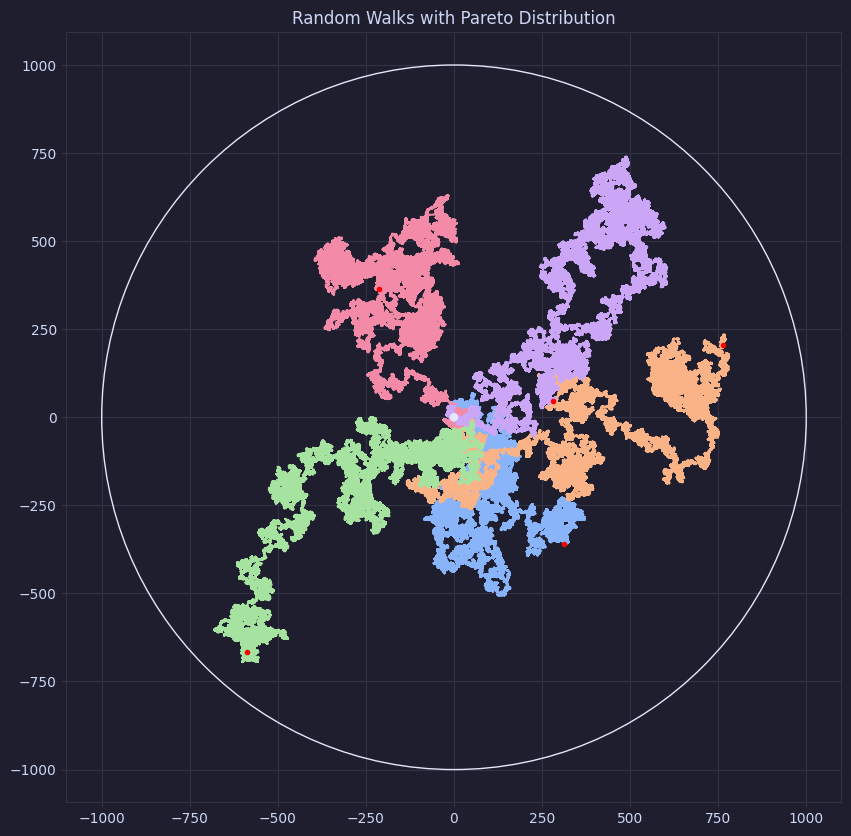

In [67]:
NUM_PATHS = 5

pareto_graph = calculate_random_paths(num_paths=NUM_PATHS, distr="pareto", alpha=4.0)
plot_random_paths(pareto_graph, distr="pareto")

In [61]:
pareto_endpoints = calculate_endpoints(num_paths=1000, distr="pareto", alpha=4.0)

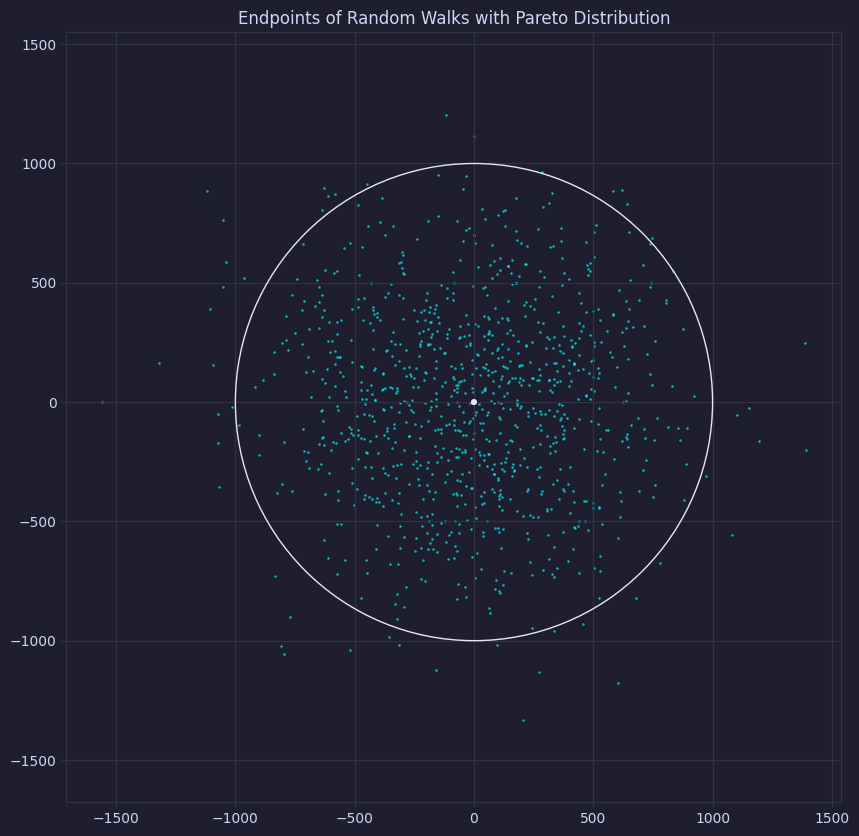

In [62]:
plot_endpoints(pareto_endpoints, distr="pareto")

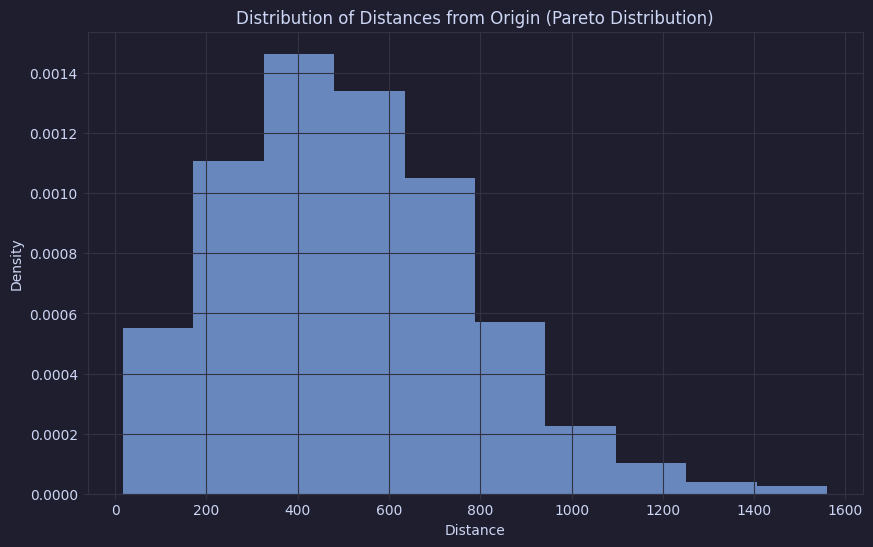

In [63]:
pareto_distances = calculate_distances(pareto_endpoints)
plot_distance_histogram(pareto_distances, distribution_name="Pareto")

In [ ]:
def compare_distance_distributions(normal_distances, pareto_distances, bins=20, alpha=0.7):
  plt.figure(figsize=(12, 8))
  
  # Calculate common range for the histograms
  min_val = min(min(normal_distances), min(pareto_distances))
  max_val = max(max(normal_distances), max(pareto_distances))
  
  # Calculate histogram data for both distributions
  hist_normal, bins_normal = np.histogram(normal_distances, bins=bins, density=True, range=(min_val, max_val))
  hist_pareto, bins_pareto = np.histogram(pareto_distances, bins=bins, density=True, range=(min_val, max_val))
  
  # Plot histograms
  plt.hist(normal_distances, bins=bins, alpha=alpha, density=True, label='Normal Distribution', color='skyblue')
  plt.hist(pareto_distances, bins=bins, alpha=alpha, density=True, label='Pareto Distribution', color='salmon')
  
  # Add reference line for expected radius
  plt.axvline(x=R0, color='red', linestyle='--', label=f"Expected radius (R₀={R0:.2f})")
  
  # Calculate and plot theoretical Rayleigh distribution for normal case
  x = np.linspace(min_val, max_val, 1000)
  sigma = np.sqrt(N) * L / np.sqrt(2)
  pdf = (x / sigma**2) * np.exp(-(x**2) / (2 * sigma**2))
  plt.plot(x, pdf, 'g-', linewidth=2, label='Theoretical Rayleigh Distribution')
  
  # Add labels and title
  plt.title("Comparison of Distance Distributions: Normal vs Pareto")
  plt.xlabel("Distance")
  plt.ylabel("Density")
  plt.legend()
  plt.grid(True)
  
  # Add statistics to the plot
  normal_mean = np.mean(normal_distances)
  pareto_mean = np.mean(pareto_distances)
  normal_std = np.std(normal_distances)
  pareto_std = np.std(pareto_distances)
  
  stats_text = f"Normal: mean={normal_mean:.2f}, std={normal_std:.2f}\nPareto: mean={pareto_mean:.2f}, std={pareto_std:.2f}"
  plt.annotate(stats_text, xy=(0.75, 0.95), xycoords='axes fraction', 
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.8))
  
  plt.show()

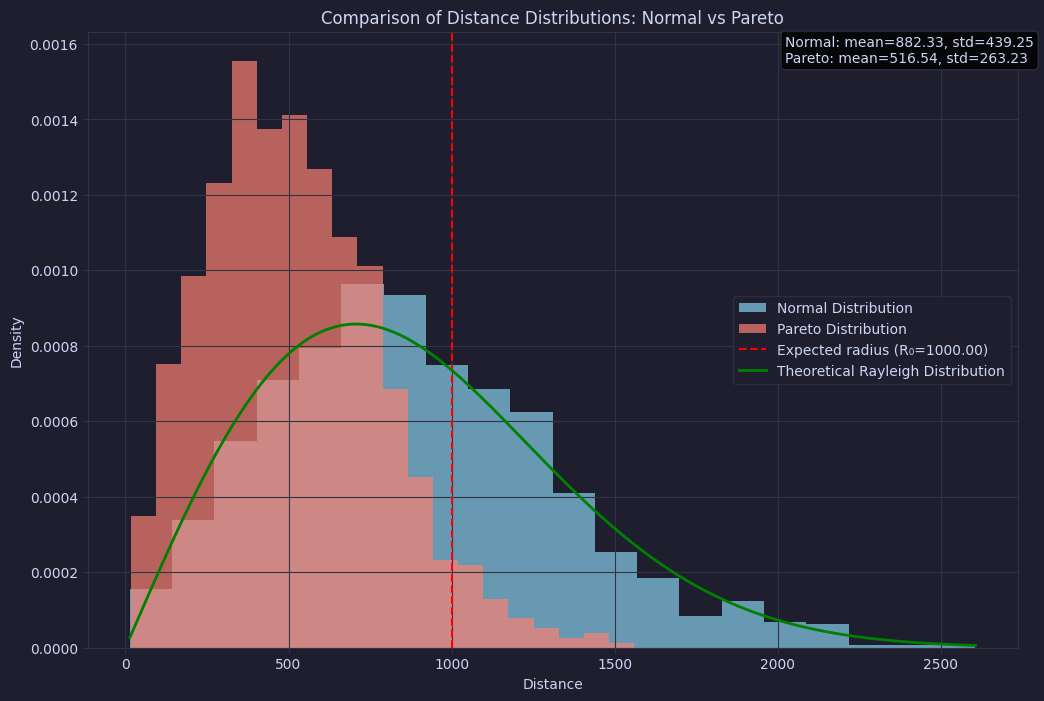

In [65]:
compare_distance_distributions(normal_distances, pareto_distances)